## Import Libraries..!!

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as skm
from sklearn.metrics import classification_report, accuracy_score

## Read dataset from csv file..!!

In [2]:
advertising_data = pd.read_csv('advertising.csv')
advertising_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
advertising_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
advertising_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
advertising_data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

## Checking Null Values & making heatmap of our dataset..!!

## Data Cleaning / Data Wrangling..!!

<AxesSubplot:>

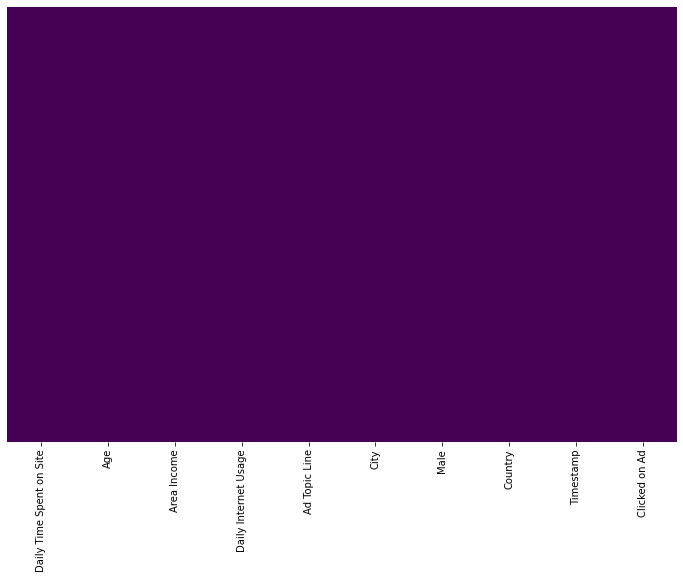

In [8]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(advertising_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## Making correlation of our dataset & making heatmap..!!

In [9]:
advertising_data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


<AxesSubplot:>

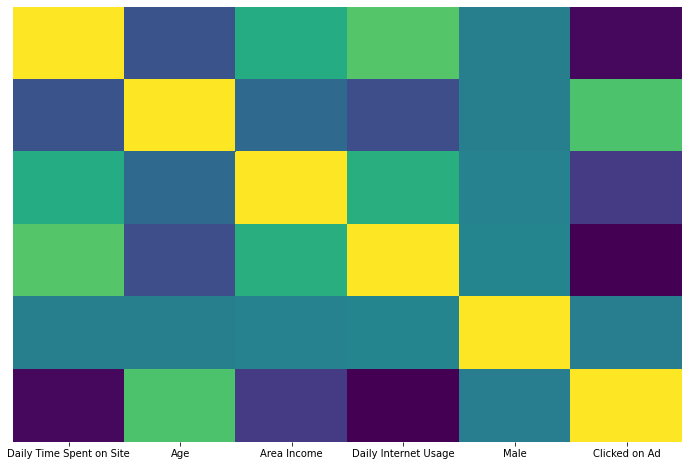

In [10]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(advertising_data.corr(), yticklabels = False, cbar = False, cmap = 'viridis')

In [11]:
advertising_data.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [12]:
advertising_data.shape

(1000, 10)

Text(0.5, 0, 'Age')

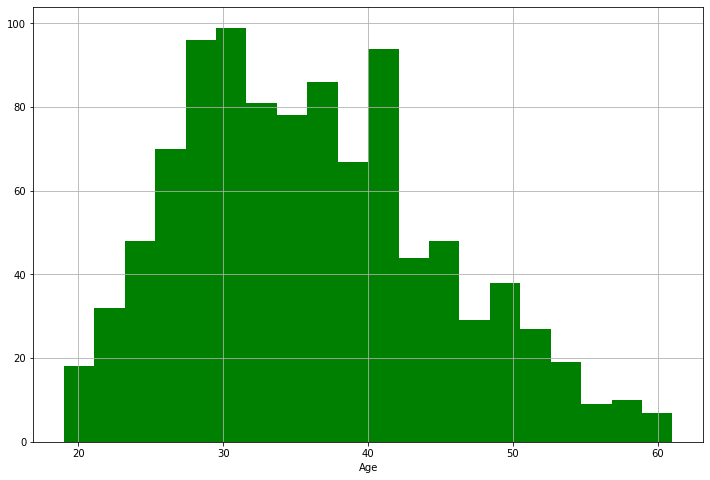

In [15]:
fig = plt.figure(figsize = (12, 8))
advertising_data['Age'].hist(bins = 20, color = 'green')
plt.xlabel('Age')

<Figure size 864x576 with 0 Axes>

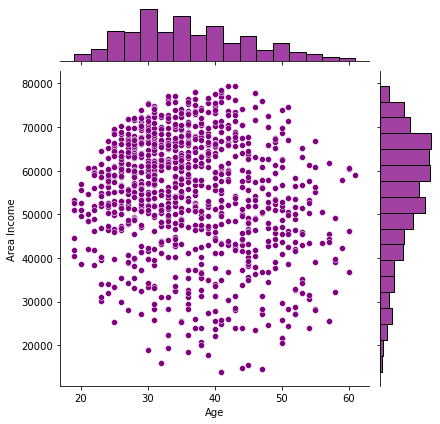

In [17]:
fig = plt.figure(figsize = (12, 8))
sns.jointplot(x = 'Age', y = 'Area Income', data = advertising_data, color = 'purple')

<Figure size 864x576 with 0 Axes>

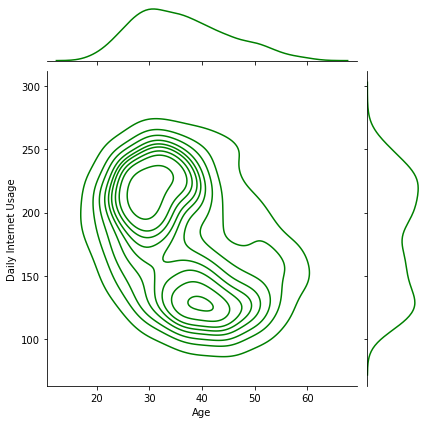

In [20]:
fig = plt.figure(figsize = (12, 8))
sns.jointplot(x = 'Age', y = 'Daily Internet Usage', data = advertising_data, color = 'green', kind = 'kde')

<Figure size 864x576 with 0 Axes>

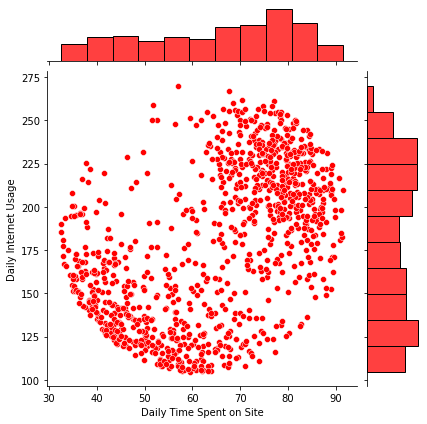

In [21]:
fig = plt.figure(figsize = (12, 8))
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = advertising_data, color = 'red')

## KDE Plot & Rug Plot..!!

G:\MyPython3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\MyPython3\lib\site-packages\seaborn\distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

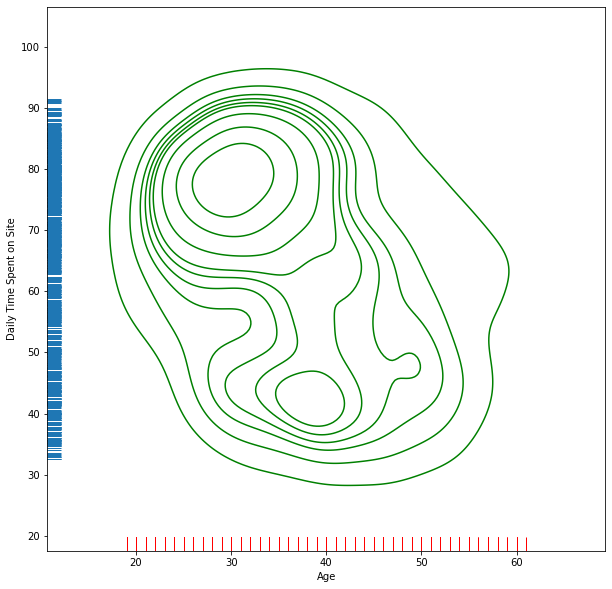

In [24]:
f, ax = plt.subplots(figsize = (10, 10)) 
sns.kdeplot(advertising_data.Age, advertising_data['Daily Time Spent on Site'], color = "g", ax = ax) 
sns.rugplot(advertising_data.Age, color = "r", ax = ax)  
sns.rugplot(advertising_data['Daily Time Spent on Site'], vertical = True, ax = ax) 

## Cubehelix Palette & KDE Plot..!!

G:\MyPython3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

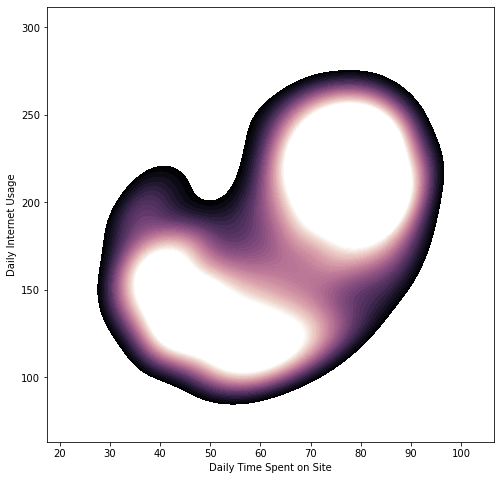

In [25]:
f, ax = plt.subplots(figsize = (8, 8))  
temp = sns.cubehelix_palette(as_cmap = True, start = 0, dark = 0, light = 3, reverse = True)  
sns.kdeplot(advertising_data["Daily Time Spent on Site"], advertising_data['Daily Internet Usage'],  
    cmap = temp, n_levels = 100, shade = True)

## Pairplot..!!

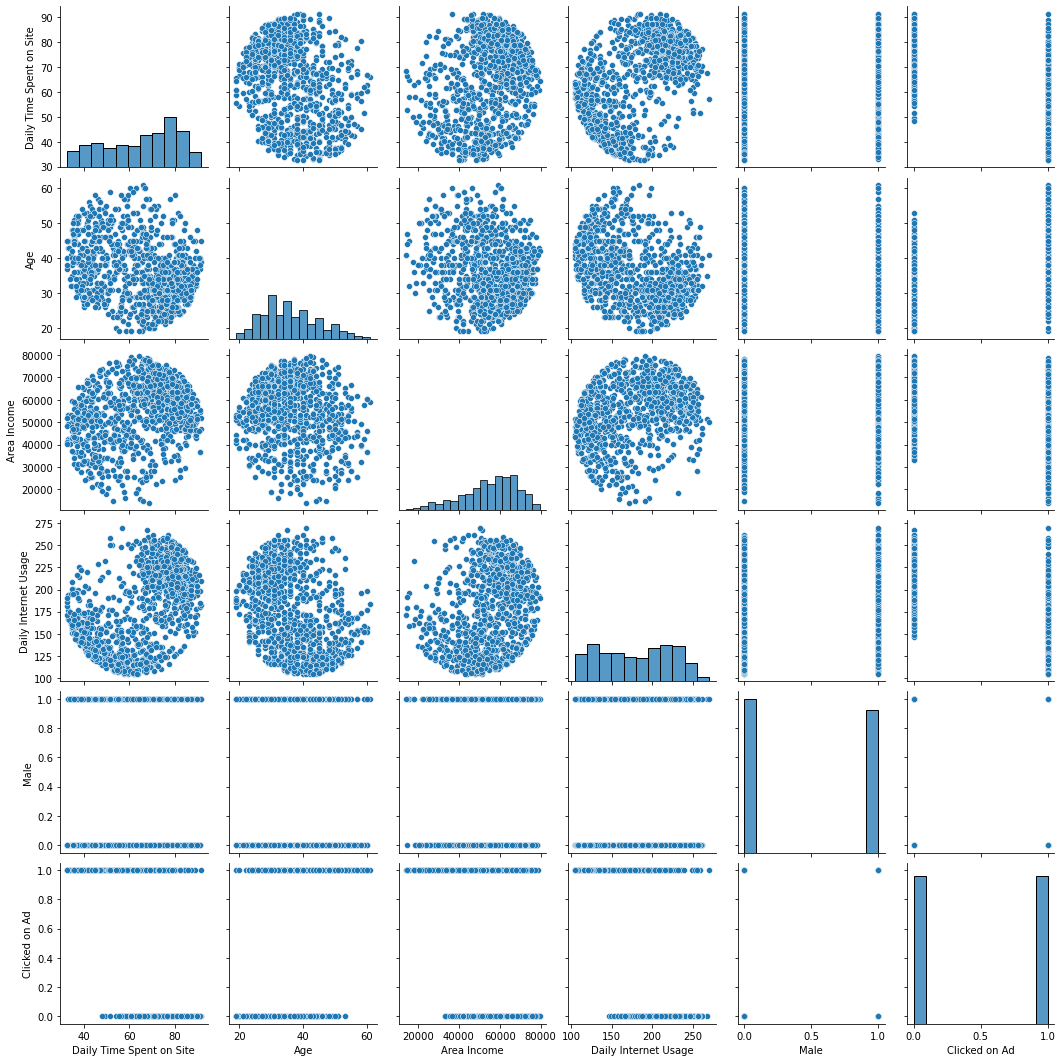

In [26]:
sns.pairplot(advertising_data, palette = 'bwr')

## Now it's time to do a train test split..!!

In [27]:
advertising_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [28]:
x = advertising_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = advertising_data['Clicked on Ad']

## Split data into train test split..!!

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 35)

## Building a Logistic Regression Model..!!

In [30]:
logistic_model = LogisticRegression()

## Now, Train our Model..!!

In [31]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

## Now, Predict our Model on Testing Part..!!

In [32]:
y_pred = logistic_model.predict(x_test)

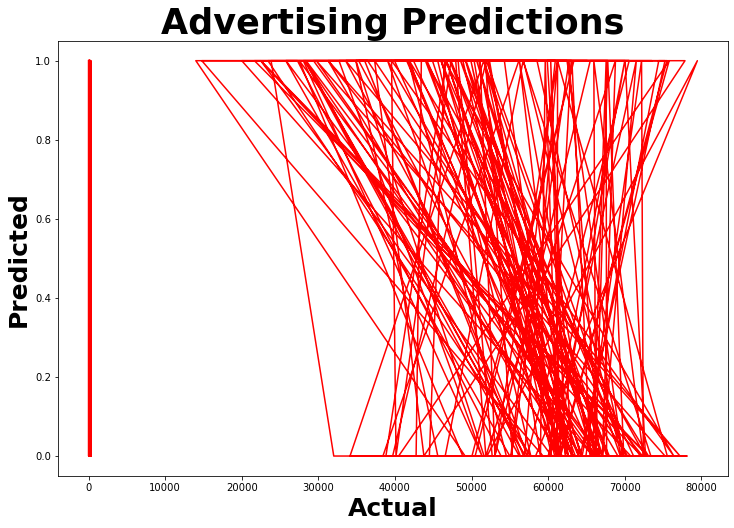

In [39]:
fig = plt.figure(figsize = (12, 8))
plt.plot(x_test, y_pred, color = 'red')
plt.title('Advertising Predictions', color = 'black', fontsize = 35, fontweight = 'bold')
plt.xlabel('Actual', color = 'black', fontsize = 25, fontweight = 'bold')
plt.ylabel('Predicted', color = 'black', fontsize = 25, fontweight = 'bold')

plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       125
           1       0.93      0.88      0.91       125

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [44]:
accuracy = logistic_model.score(x_train, y_train)
print("Logistic Regression Model Accuracy:", accuracy * 100, "%")

Logistic Regression Model Accuracy: 89.06666666666668 %


# THE END..!!